**Building a CNN for the Emotional Facial Recognization**

Upload the dataset

In [1]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

Done


In [2]:
!kaggle datasets download jonathanoheix/face-expression-recognition-dataset
!ls

 87% 105M/121M [00:01<00:00, 99.2MB/s] 
100% 121M/121M [00:01<00:00, 94.5MB/s]
face-expression-recognition-dataset.zip  sample_data


In [3]:
!unzip -o face-expression-recognition-dataset.zip
!ls

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/9606.jpg  
  inflating:

# Convolutional Neural Networks- Emotion Facial Recognition

Convolutional Neural Networks (CNNs) are deep neural networks with the addition of two very special types of layers: convolutional layers and pooling layers. 

Import neccessary Libraries, Check Version of Tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

print(tf.__version__)

2.8.2


Use OS library to Unzip and Display the Two tests sets in the data.

In [5]:
import os
import zipfile

zipfile.ZipFile('face-expression-recognition-dataset.zip').extractall()
os.listdir('./images/images/')

['train', 'validation']

Assign and Set the Train and Validation to Variables, print out the 7 emotions within the data. 

In [6]:
#Checking the details of the train and test data

train_dir = './images/images/train/'
train_categories = set(os.listdir(train_dir))
validation_dir = './images/images/validation/'
test_categories = set(os.listdir(validation_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
7


Exploratory Data Anaylsis - Display every emotion. 

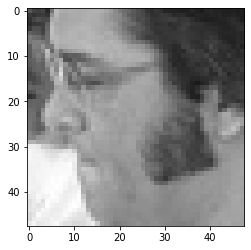

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt

sample_dir = os.path.join(train_dir, 'angry')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

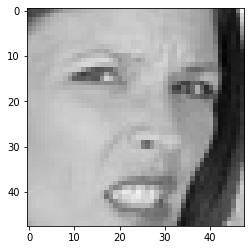

In [8]:
sample_dir = os.path.join(train_dir, 'disgust')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

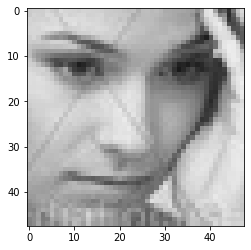

In [9]:
sample_dir = os.path.join(train_dir, 'fear')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

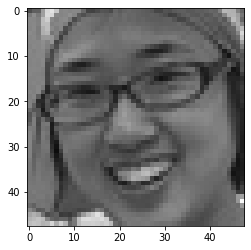

In [10]:
sample_dir = os.path.join(train_dir, 'happy')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

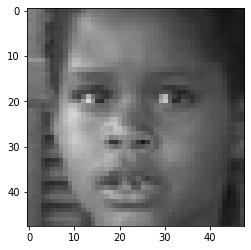

In [11]:
sample_dir = os.path.join(train_dir, 'neutral')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

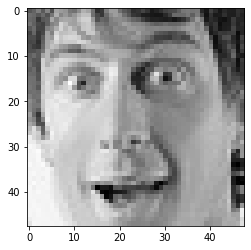

In [12]:
sample_dir = os.path.join(train_dir, 'surprise')
img = cv.imread(os.path.join(sample_dir, os.listdir(sample_dir)[0]))
_ = plt.imshow(img)

Using img to show the color encoding range:

In [13]:
img.min(), img.max()

(0, 255)

Using the TensorFlow Keras it has a class called DirectoryIterator that can help with getting the images in the model.

In [14]:
import tensorflow as tf

train_dir = './images/images/train/'

train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=128,
    image_data_generator=None)

Found 28821 images belonging to 7 classes.


Validate the images 

In [15]:
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 0)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 1)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 2)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 3)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 4)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 5)[0][0]])
print(train_image_iterator.filepaths[np.where(train_image_iterator.labels == 6)[0][0]])

./images/images/train/angry/0.jpg
./images/images/train/disgust/10018.jpg
./images/images/train/fear/10010.jpg
./images/images/train/happy/100.jpg
./images/images/train/neutral/1000.jpg
./images/images/train/sad/10006.jpg
./images/images/train/surprise/10007.jpg


We input our images into a convolutional layer followed by a pooling layer. After stacking a few convolutional layers and pooling layers, we flatten the final pooling output and finish with some traditional dense layers. The final dense layer is 7 nodes wide and is activated by softmax. This layer represents our classification predictions.

In [62]:
#MODEL 1
#preset CNN model 
#accuracy : 0.3589
#epochs : 10 
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])



model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 100, 100, 16)      160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 64)      

In [52]:
#MODEL 2
#added a 2,2 to Max Pooling 2D layer 
#accuracy : .37
#epochs : 10 
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 49, 49, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 64)      

In [41]:
#MODEL 3
#changed the activation function to tanh to train the data closer to zero in hopes to improve the accuracy. 
#accuracy: 0.2089
#epochs :10 
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='tanh',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 49, 49, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 64)      

In [ ]:
#MODEL 4
#loss: 0.2560 - accuracy: 0.92
#epochs : 100
#removed the 2D pooling layer inputs, added more epochs to increase the accuracy, wanted to get closer to 90. But this was a huge increase in accuracy. 

 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
#increased the epochs to 100 
#accuracy: .92

Split the Data into Training and Validation, then add hyperparameters, to fit this model using Image Data Generator

Add early stopping to stop training when parameter updates no longer begin to yield improves on a validation set.

In [40]:
#Model 5
"""
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu',
                           input_shape=(100, 100, 1)),
    tf.keras.layers.BatchNormalization(),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),                        
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),   
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax') #no. of classes
    ])

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 50, 50, 32)       1

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/images/'
datagen_train  = ImageDataGenerator()
data_val =ImageDataGenerator()


train_set = datagen_train.flow_from_directory(train_dir+"train",
                                              target_size = (100,100),
                                              color_mode = 'grayscale',
                                              batch_size = 28,
                                              class_mode = 'categorical',)                                            

val_set = data_val.flow_from_directory(train_dir+"validation",
                                              target_size = (100,100),
                                              color_mode = 'grayscale',
                                              batch_size = 28,
                                              class_mode = 'categorical')  



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:

from tensorflow.keras.callbacks import Callback, EarlyStopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    min_delta=0.00005,
    patience=3,
    verbose=1,
    restore_best_weights=True,
 

)
history = model.fit(train_set,
    steps_per_epoch = 100,
    epochs=100, 
    callbacks=[early_stopping],
)


In [ ]:
"""
#for model 5 
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.00005,
    patience=3,
    verbose=1,
    restore_best_weights=True,
 

)


reduce_learningrate = ReduceLROnPlateau(monitor='loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

model5.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model5.fit(train_set,
    steps_per_epoch = 100,
    epochs=100, 
    callbacks=[early_stopping,reduce_learningrate])
"""

Plot the loss 

Generalize the Data and Use it to make predicting.

In [78]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/images/validation'

                                           

test_image_iterator =tf.keras.preprocessing.image.DirectoryIterator(
    directory = test_dir,
    target_size = (100,100),
    color_mode = 'grayscale',
    batch_size = 28,
    class_mode = 'categorical',
    image_data_generator=None)


model.evaluate(test_image_iterator)
a = model.predict(test_image_iterator,)
a


Found 7066 images belonging to 7 classes.
253/253 [==============================] - 23s 89ms/step - loss: 2.9657 - accuracy: 0.4656


array([[5.4923171e-01, 2.5076842e-01, 6.9633240e-01, ..., 4.0847841e-01,
        8.6064130e-02, 3.1224054e-01],
       [1.1726865e-01, 1.0009053e-04, 9.1625708e-01, ..., 6.2435597e-01,
        5.1677680e-01, 9.8647463e-01],
       [9.2778939e-01, 2.3283064e-02, 9.9239099e-01, ..., 9.8510808e-01,
        9.9022663e-01, 7.8327745e-02],
       ...,
       [6.5786338e-01, 1.2022427e-04, 3.6135066e-01, ..., 9.9838042e-01,
        9.3104881e-01, 2.1643728e-02],
       [1.5640554e-01, 5.3816098e-01, 2.5905162e-01, ..., 4.5705274e-01,
        9.8066342e-01, 9.0024590e-02],
       [2.0415562e-01, 1.4458001e-03, 1.5165654e-01, ..., 8.2072884e-01,
        1.6818720e-01, 9.0865171e-01]], dtype=float32)

In [79]:
a[0]
loc = []
for b in range(len(a)):
  loc.append(np.argmax(a[b])
  )
print(loc)

[2, 6, 2, 3, 4, 5, 4, 0, 5, 5, 3, 3, 3, 2, 6, 6, 0, 2, 3, 5, 0, 5, 5, 3, 6, 5, 4, 4, 3, 3, 2, 2, 3, 5, 5, 0, 3, 3, 0, 4, 0, 2, 3, 6, 6, 3, 5, 0, 5, 0, 6, 3, 3, 0, 0, 5, 5, 0, 3, 6, 1, 3, 2, 5, 2, 3, 4, 4, 2, 3, 5, 2, 4, 2, 6, 3, 5, 0, 2, 2, 4, 2, 2, 3, 5, 2, 3, 5, 2, 3, 5, 4, 3, 6, 4, 2, 0, 5, 0, 5, 3, 4, 4, 3, 5, 6, 0, 3, 4, 2, 6, 5, 3, 4, 2, 4, 0, 1, 3, 5, 2, 5, 5, 3, 3, 5, 4, 4, 4, 4, 3, 3, 6, 6, 3, 3, 4, 3, 5, 4, 5, 5, 5, 6, 3, 3, 4, 4, 3, 2, 5, 2, 4, 3, 0, 6, 3, 3, 3, 4, 3, 0, 0, 2, 2, 5, 6, 5, 4, 5, 6, 5, 2, 3, 2, 4, 2, 5, 2, 5, 6, 3, 4, 0, 2, 3, 0, 0, 2, 2, 3, 3, 5, 2, 4, 3, 2, 4, 5, 4, 3, 3, 3, 4, 3, 0, 3, 2, 2, 3, 3, 2, 6, 2, 3, 2, 6, 6, 2, 4, 3, 0, 3, 3, 2, 6, 4, 3, 6, 2, 3, 6, 4, 4, 0, 4, 5, 2, 5, 3, 0, 3, 4, 6, 0, 2, 3, 3, 5, 3, 3, 3, 4, 3, 3, 4, 2, 3, 3, 3, 6, 6, 5, 3, 3, 3, 5, 4, 6, 2, 4, 4, 5, 4, 0, 6, 3, 3, 2, 3, 3, 6, 0, 5, 2, 5, 5, 4, 6, 5, 4, 6, 0, 3, 0, 0, 4, 5, 5, 6, 1, 5, 3, 3, 3, 0, 6, 3, 6, 4, 5, 3, 2, 4, 3, 4, 0, 0, 0, 1, 5, 0, 4, 0, 0, 4, 5, 3, 5, 0, 3, 5, 5, 

Assign the True and preidct and use it to get the f1 score, accuracy score and precision score. 

In [81]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import numpy as np
y_true = test_image_iterator.classes

y_pred = loc

print(f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true, y_pred, normalize=True))
print(precision_score(y_true, y_pred, average = "weighted"))

0.171846613754923
0.17322388904613642
0.17119354429331102


Print a random image to show that the model can predict the emotion. 

In [82]:
import matplotlib.pyplot as plt
a[100]
#plt.imshow(b[100])


array([9.9745595e-01, 1.3130903e-04, 9.8369348e-01, 9.9999088e-01,
       3.4817892e-01, 9.2942280e-01, 9.9722274e-07], dtype=float32)

Plot the training loss over time. 

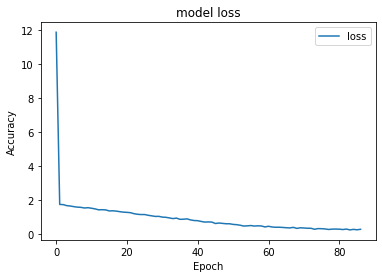

In [83]:

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['loss'])
plt.show()

Plot the training accuracy over time using Matplotlib.

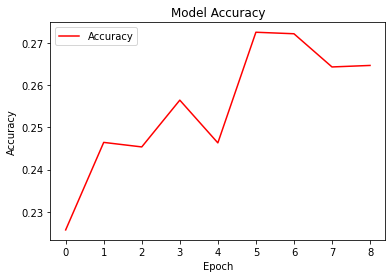

In [70]:
plt.plot(history.history['accuracy'],'r')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.show()